In [1]:
# Importamos las bibliotecas necesarias:
import pandas as pd # - pandas para trabajar con datos en forma de tablas
import numpy as np # - numpy para operaciones numéricas
import matplotlib.pyplot as plt # - matplotlib.pyplot para visualización de gráficos
import seaborn as sns # - seaborn para mejorar la visualización de los gráficos con estilos y paletas adicionales

In [5]:
# Leemos el archivo CSV "df.csv" y carga los datos en un DataFrame llamado "df".
df = pd.read_csv("df.csv")

In [6]:
df.head()

,fecha,hora_declarada,ruta,operador,numero_de_vuelo,tipo_de_ruta,tipo_de_aeronave,matricula,numero_construccion_ldm,pasajeros_a_bordo,tripulacion_a_bordo,total_a_bordo,pasajeros_fallecidos,tripulacion_fallecidos,total_fallecidos,suelo,resumen
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,1.0,1.0,2.0,1.0,0.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,0.0,5.0,5.0,0.0,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,NaN,NaN,20.0,NaN,NaN,14.0,0.0,The airship flew into a thunderstorm and encou...


In [7]:
df.describe()

,pasajeros_a_bordo,tripulacion_a_bordo,total_a_bordo,pasajeros_fallecidos,tripulacion_fallecidos,total_fallecidos,suelo
count,4787.000000,4789.000000,4991.000000,4773.000000,4773.000000,5000.000000,4964.000000
mean,26.877376,4.519524,31.121218,18.940708,3.587262,22.294000,1.718372
std,44.035342,3.758072,45.479965,34.065190,3.177315,35.000385,55.495544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,7.000000,1.000000,2.000000,4.000000,0.000000
50%,12.000000,4.000000,16.000000,7.000000,3.000000,11.000000,0.000000
75%,30.000000,6.000000,35.000000,21.000000,5.000000,25.000000,0.000000
max,614.000000,83.000000,644.000000,560.000000,43.000000,583.000000,2750.000000


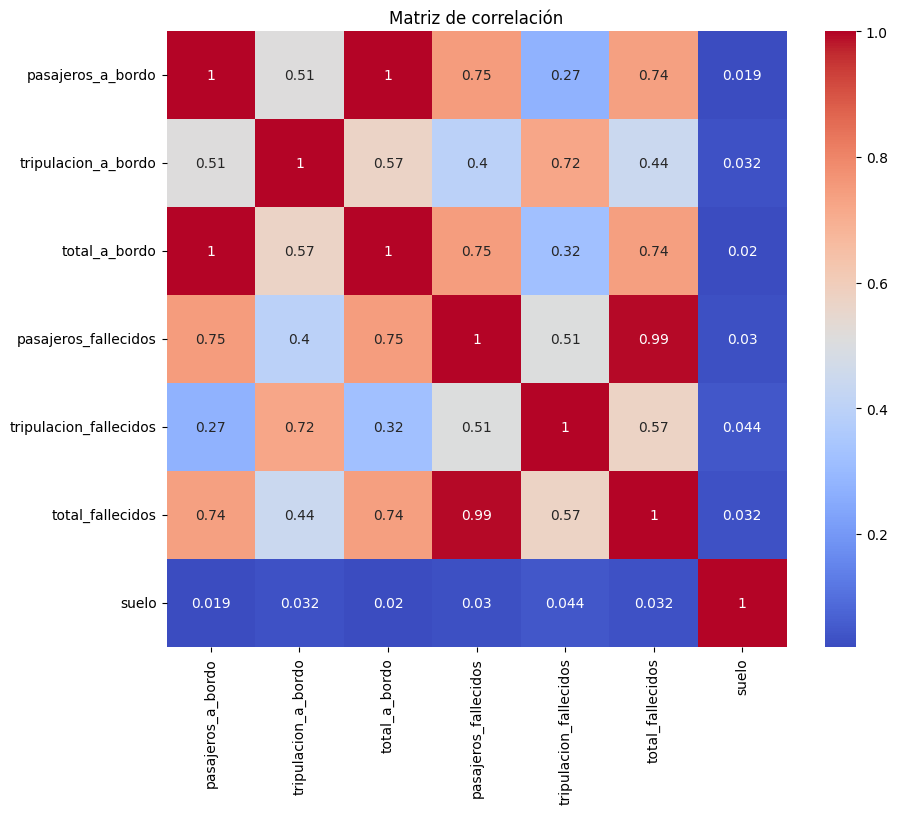

In [15]:
# Matriz de correlación
corr_vars = ["pasajeros_a_bordo", "tripulacion_a_bordo", "total_a_bordo", "pasajeros_fallecidos", "tripulacion_fallecidos", "total_fallecidos", "suelo"]
corr_matrix = df[corr_vars].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

El código muestra un mapa de calor que representa visualmente la matriz de correlación entre las variables seleccionadas del DataFrame df. Esto permite identificar patrones de correlación entre las variables y comprender las relaciones entre ellas.

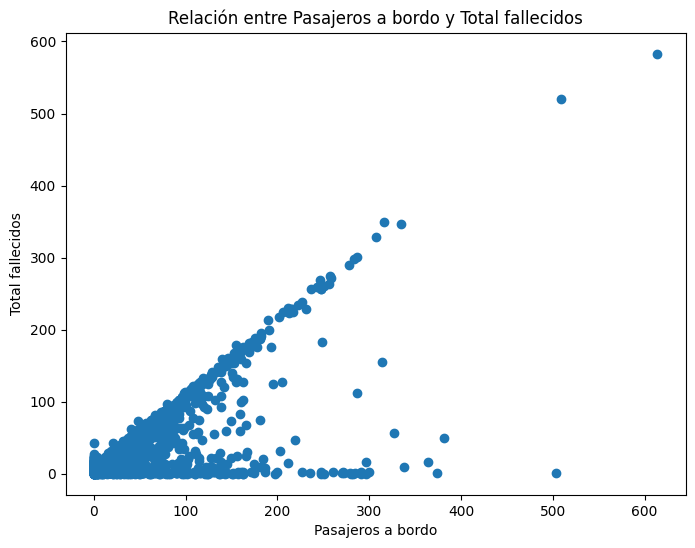

In [16]:
# Gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['pasajeros_a_bordo'], df['total_fallecidos'])
plt.xlabel('Pasajeros a bordo')
plt.ylabel('Total fallecidos')
plt.title('Relación entre Pasajeros a bordo y Total fallecidos')
plt.show()

El código genera un gráfico de dispersión que muestra la relación entre la cantidad de pasajeros a bordo y el número total de fallecidos en los accidentes de aviones, utilizando los datos del DataFrame df. Esto permite visualizar si existe alguna relación o patrón entre estas dos variables.

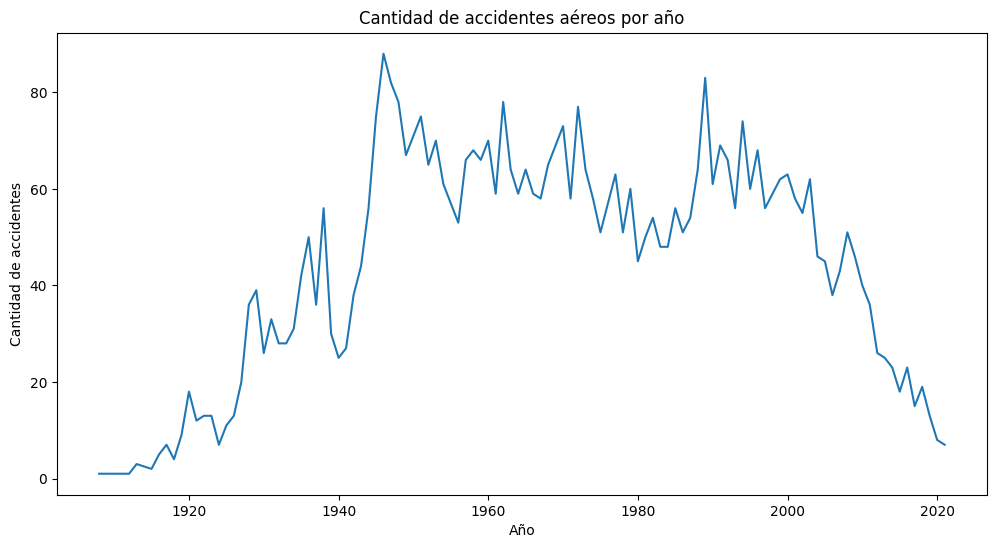

In [17]:
# Crear una columna de año
df['año'] = df['fecha'].dt.year

# Contar la cantidad de accidentes por año
accidentes_por_año = df['año'].value_counts().sort_index()

# Gráfico de líneas de accidentes aéreos a lo largo del tiempo
plt.figure(figsize=(12, 6))
accidentes_por_año.plot(kind='line')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes aéreos por año')
plt.show()

El código agrega una columna de año al DataFrame df, cuenta la cantidad de accidentes por año y luego crea un gráfico de líneas que muestra la cantidad de accidentes aéreos a lo largo del tiempo. Esto permite visualizar la evolución de los accidentes aéreos en función del año.

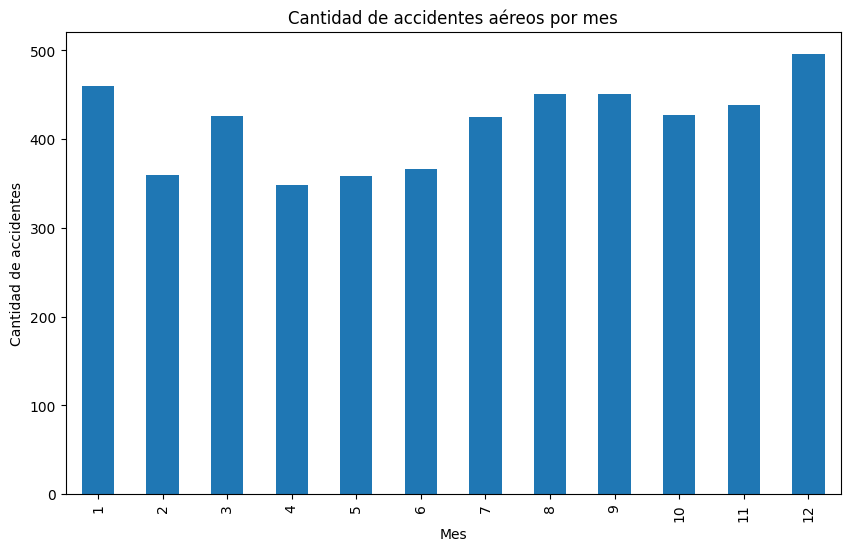

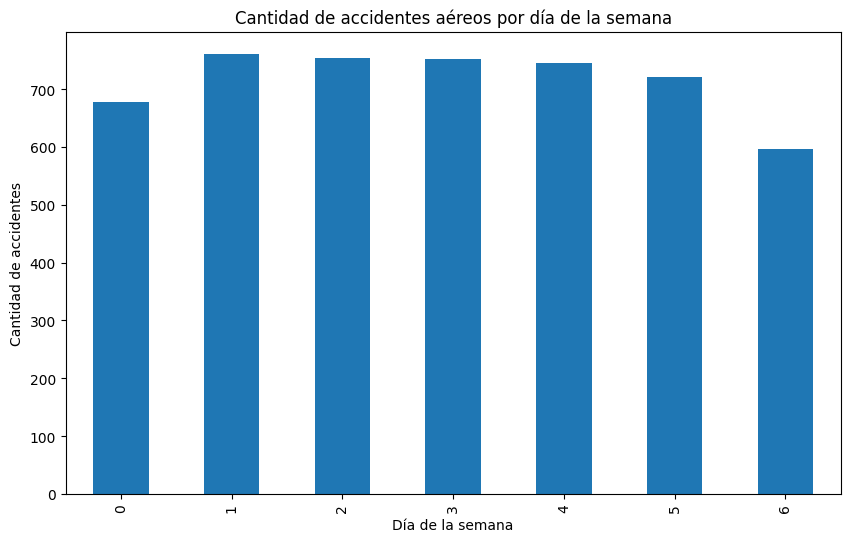

In [18]:

df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.dayofweek


accidentes_por_mes = df['mes'].value_counts().sort_index()
accidentes_por_dia_semana = df['dia_semana'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
accidentes_por_mes.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes aéreos por mes')
plt.show()


plt.figure(figsize=(10, 6))
accidentes_por_dia_semana.plot(kind='bar')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes aéreos por día de la semana')
plt.show()

En resumen, el código agrega columnas de 'mes' y 'dia_semana' al DataFrame df, cuenta la cantidad de accidentes por mes y por día de la semana, y crea gráficos de barras para visualizar la distribución de accidentes aéreos en función de estos períodos. Esto permite analizar la variación de accidentes aéreos según el mes y el día de la semana.

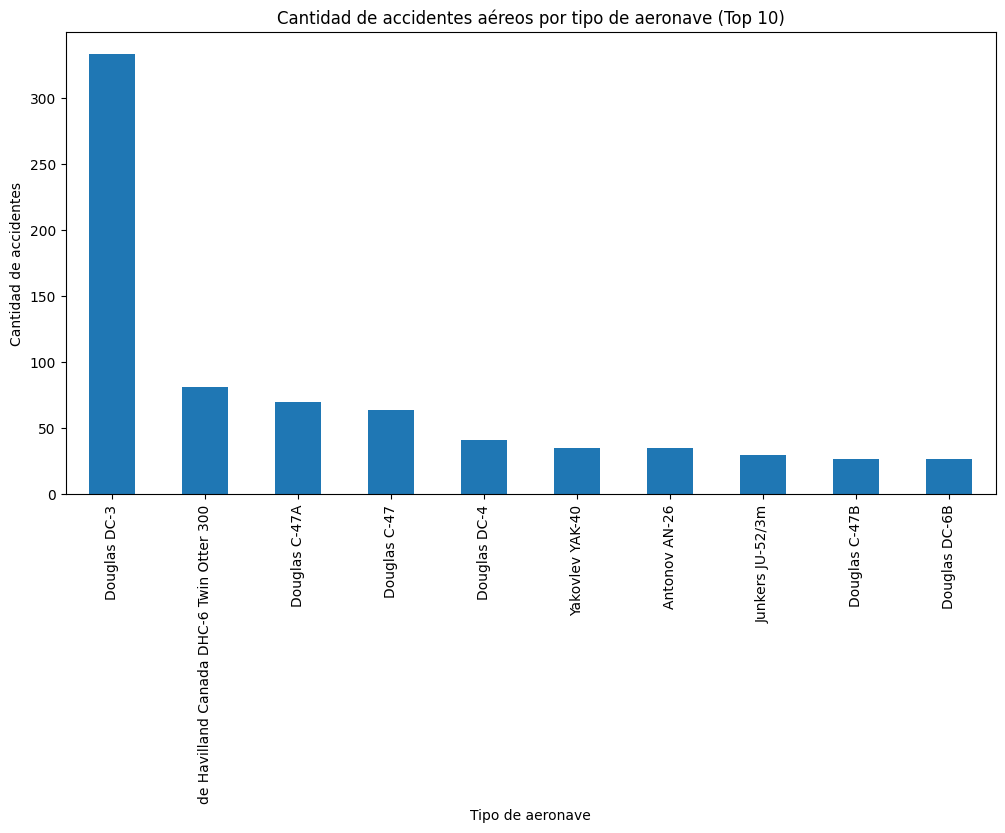

In [20]:
accidentes_por_tipo_aeronave = df['tipo_de_aeronave'].value_counts().head(10)

plt.figure(figsize=(12, 6))
accidentes_por_tipo_aeronave.plot(kind='bar')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes aéreos por tipo de aeronave (Top 10)')
plt.show()

El código cuenta la cantidad de accidentes aéreos por tipo de aeronave y crea un gráfico de barras para mostrar los 10 tipos de aeronave más comunes en términos de accidentes. Esto permite visualizar las aeronaves con mayor incidencia de accidentes.

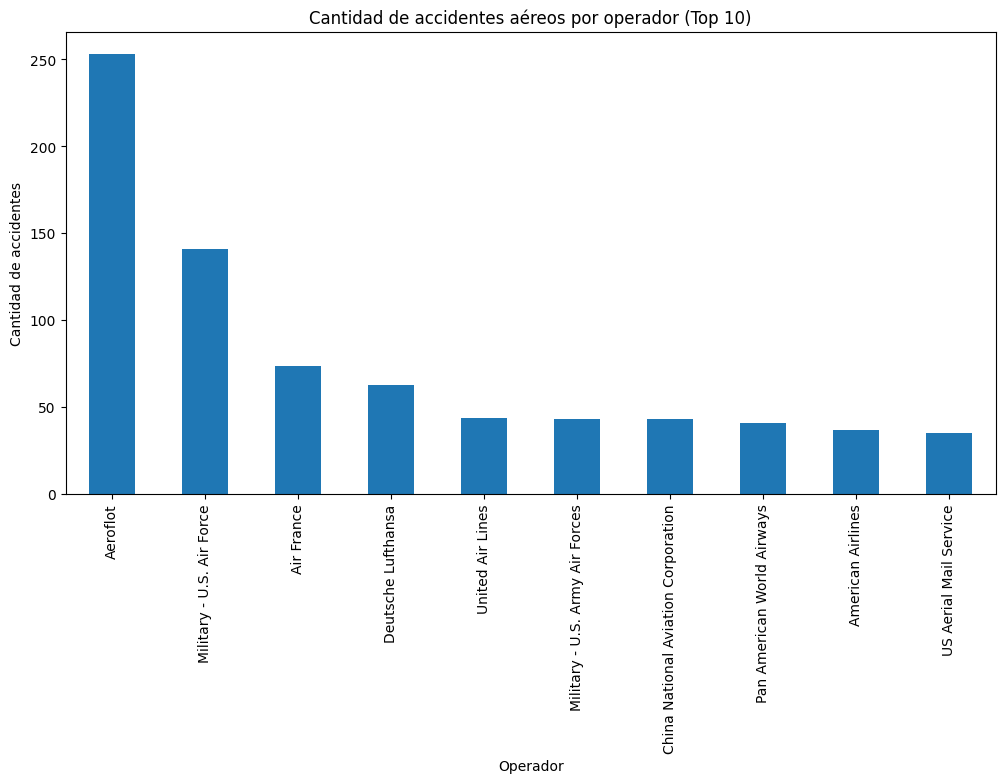

In [21]:
accidentes_por_operador = df['operador'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
accidentes_por_operador.plot(kind='bar')
plt.xlabel('Operador')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes aéreos por operador (Top 10)')
plt.show()

El código cuenta la cantidad de accidentes aéreos por operador y crea un gráfico de barras para mostrar los 10 operadores más comunes en términos de accidentes. Esto permite visualizar los operadores con mayor incidencia de accidentes aéreos.

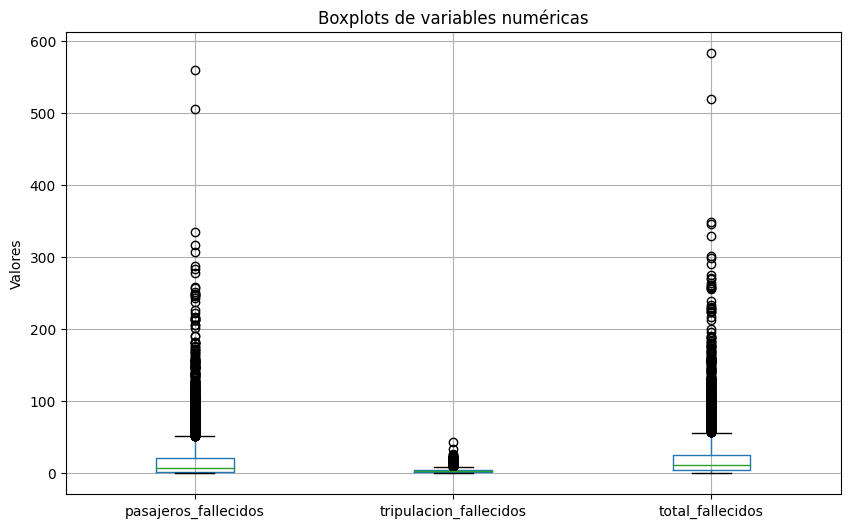

In [24]:
variables_numericas = ["pasajeros_fallecidos", "tripulacion_fallecidos", "total_fallecidos"]

plt.figure(figsize=(10, 6))
df[variables_numericas].boxplot()
plt.ylabel('Valores')
plt.title('Boxplots de variables numéricas')
plt.show()